In [25]:
from tensorflow import keras
model = keras.models.load_model('best-cnn-model.h5')

In [26]:
# 모델의 층을 알려줌 conv - pooling - conv - pooling - flatten - dense - dropout - dense
model.layers

In [27]:
# 첫번째 conv층의 가중치를 알아보기위해 conv에 저장
conv = model.layers[0]

print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [28]:
# 쉽게 다룰 수 있도록 numpy 배열로 변환하고
# 가중치의 평균과 표준편차를 출력
conv_weights = conv.weights[0].numpy()

print(conv_weights.mean(), conv_weights.std())

-0.033592563 0.25458217


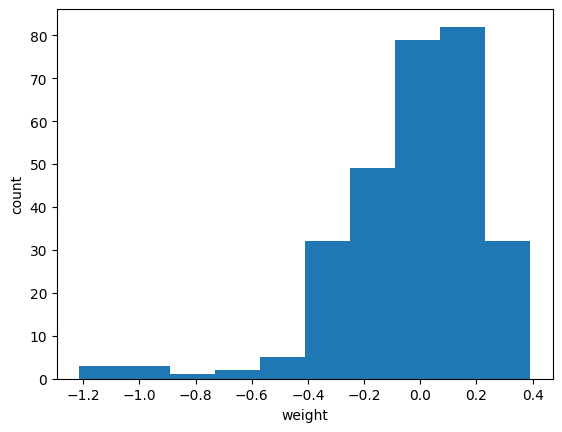

In [29]:
# matplotlib에서 history로 그리려면 입력을 1차원으로 전달해야 함
import matplotlib.pyplot as plt
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

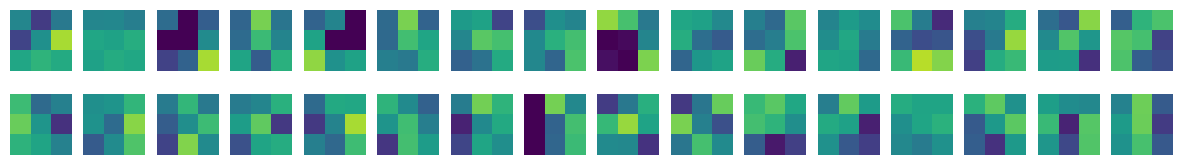

In [30]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [31]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation=\
                                          'relu', padding='same', input_shape=(28,28,1)))

In [32]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [33]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0042179655 0.084763765


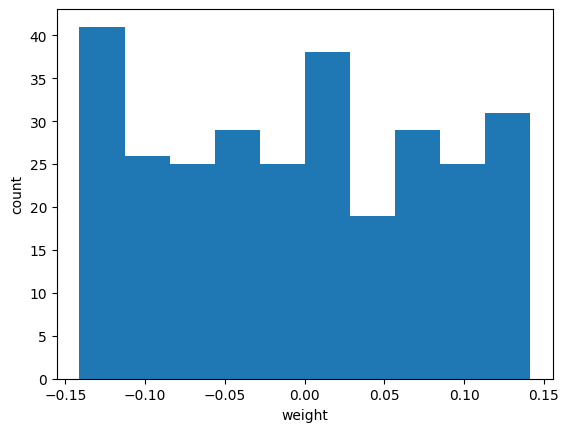

In [34]:
plt.hist(no_training_weights.reshape(-1,1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

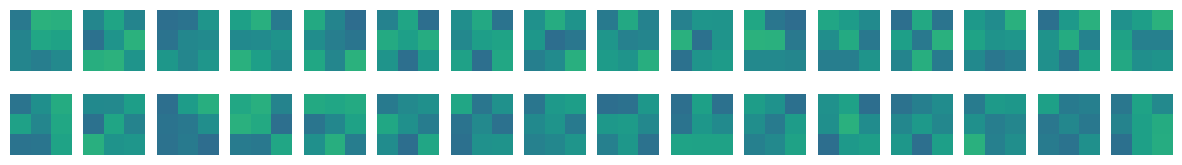

In [36]:
fig, axs = plt.subplots(2, 16, figsize=(15,2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:,:,0,i*16 + j], vmin=-0.5, vmax=0.5)
        axs[i, j].axis('off')

plt.show()

In [37]:
conv_acti = keras.Model(model.input, model.layers[0].output)

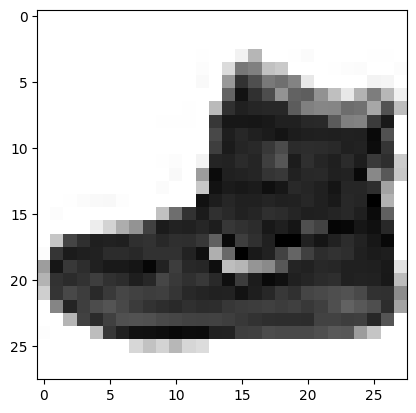

In [38]:
(train_input, train_target), (test_input, test_target) =\
    keras.datasets.fashion_mnist.load_data()
plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [39]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 6s 6s/step


In [40]:
print(feature_maps.shape)

(1, 28, 28, 32)


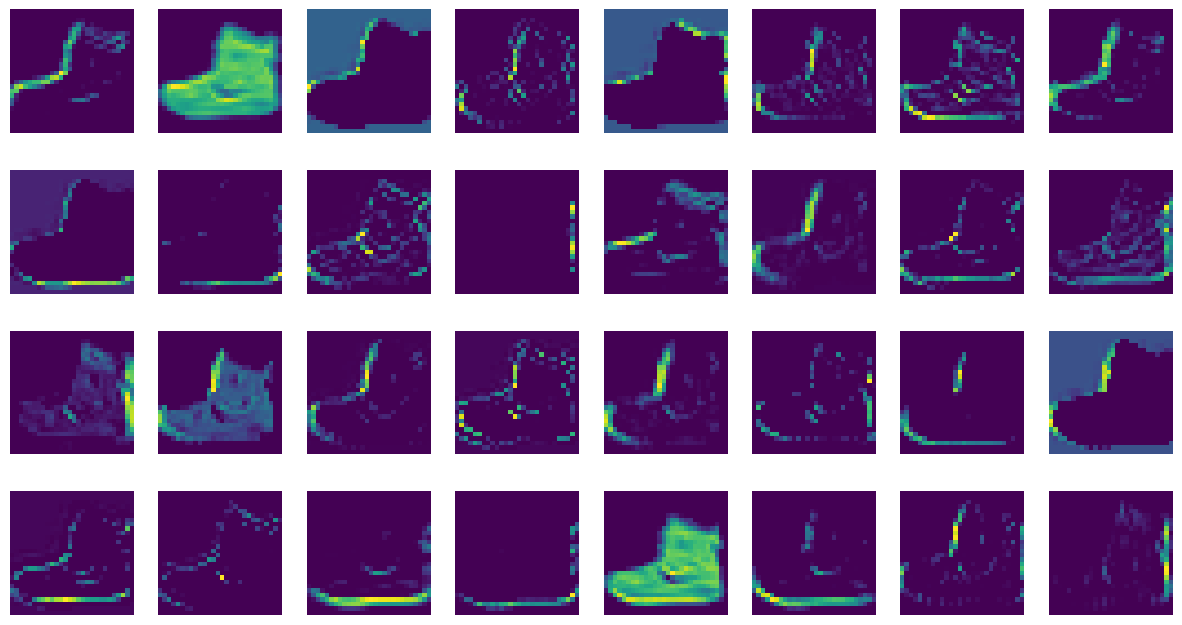

In [44]:
fig, axs = plt.subplots(4, 8, figsize=(15,8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()

In [50]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [51]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 389ms/step


In [52]:
print(feature_maps.shape)

(1, 14, 14, 64)


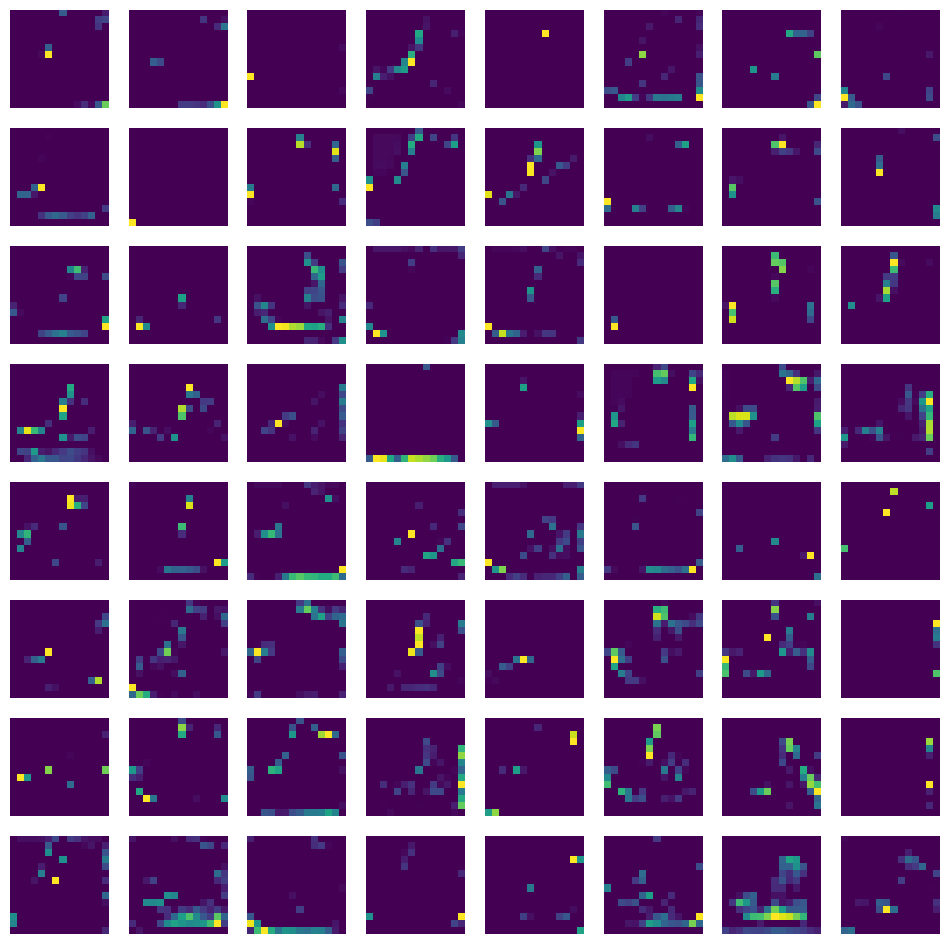

In [53]:
fig, axs = plt.subplots(8, 8, figsize=(12,12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0,:,:,i*8 + j])
        axs[i, j].axis('off')

plt.show()